# Datenanalyse mit KI & Machine Learning
## Decision Trees und Random Forest

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
# Schwertlilien-Datensatz laden:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


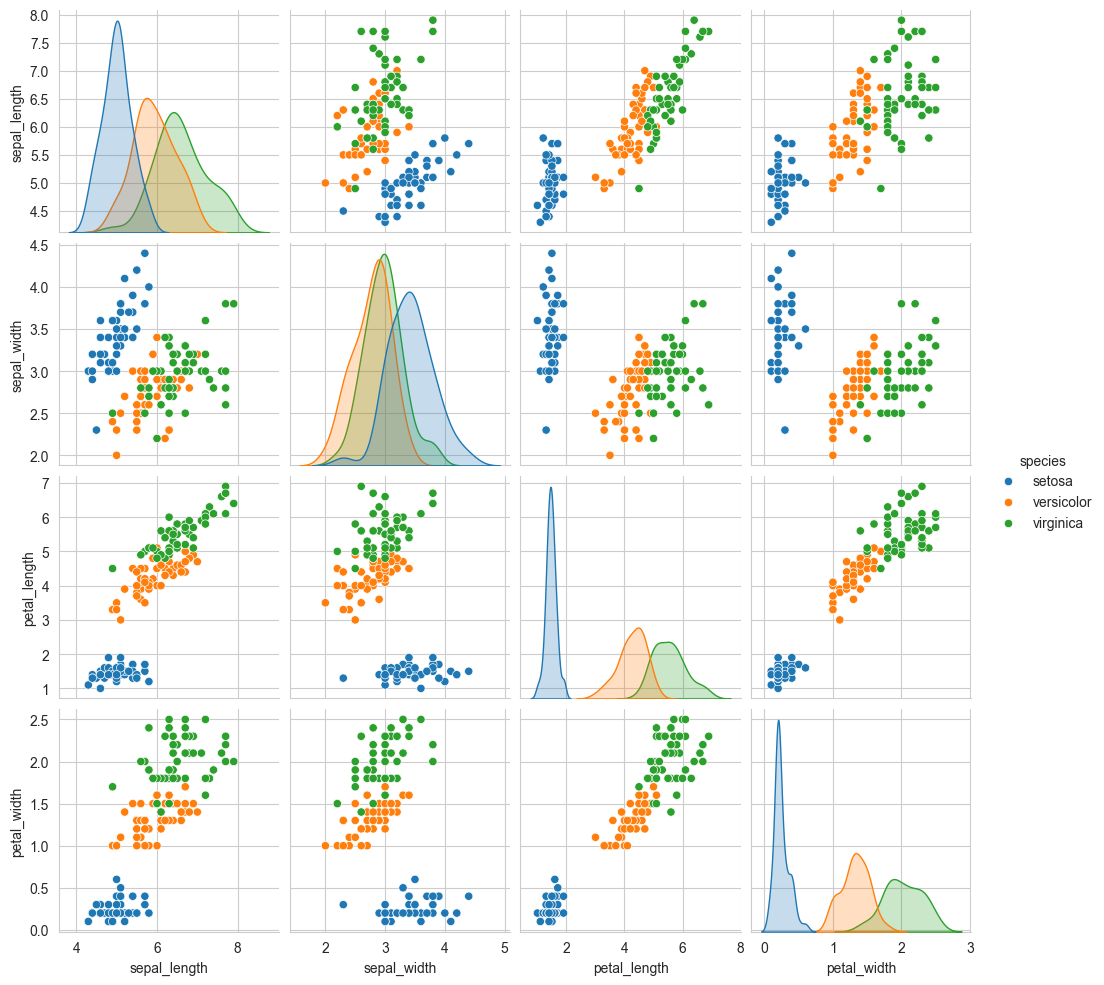

In [4]:
sns.pairplot(iris, hue='species')

In [5]:
# Features und Zielvariable:
X = iris.drop('species', axis=1)
y = iris['species']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=1)

In [7]:
y_train.value_counts()

species
virginica     44
setosa        39
versicolor    37
Name: count, dtype: int64

# Decision Trees

Vereinfachte Beispiele für einen Entscheidungsbaum:
* https://miro.medium.com/v2/resize:fit:828/format:webp/0*zT1JQss0oGTkTYzD.png
* https://d14b9ctw0m6fid.cloudfront.net/ugblog/wp-content/uploads/2020/12/17a.png

Ein Entscheidungsbaum ist eine Abfolge von if/else-Statements,
die der Algorithmus an unsere Daten (anhand gewisser Spalten) stellt.
Mit jeder dieser Fragen versucht er, die Daten in einem Bereich
maximal nach den unterschiedlichen darin vorkommenden Klassen zu trennen
Je mehr solcher "Fragen" der Baum stellt, über eine desto höhere Tiefe (depth) verfügt er.
Die Endpunkte dieser Fragen nennen sich Blätter (leafs) und dort finden sich nur noch
Vertreter von einer Klasse vor (100% Reinheit, purity), sofern wir die Äste nicht
künstlich vorher stutzen (pruning)! (Nötig bei Overfitting!)

In [8]:
# Baum-Modell aufstellen:
tree = DecisionTreeClassifier(random_state=42)
tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [9]:
# Modell trainieren:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [10]:
# Modellgüte prüfen:
tree.score(X_test, y_test)

0.9666666666666667

In [11]:
tree.feature_names_in_

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

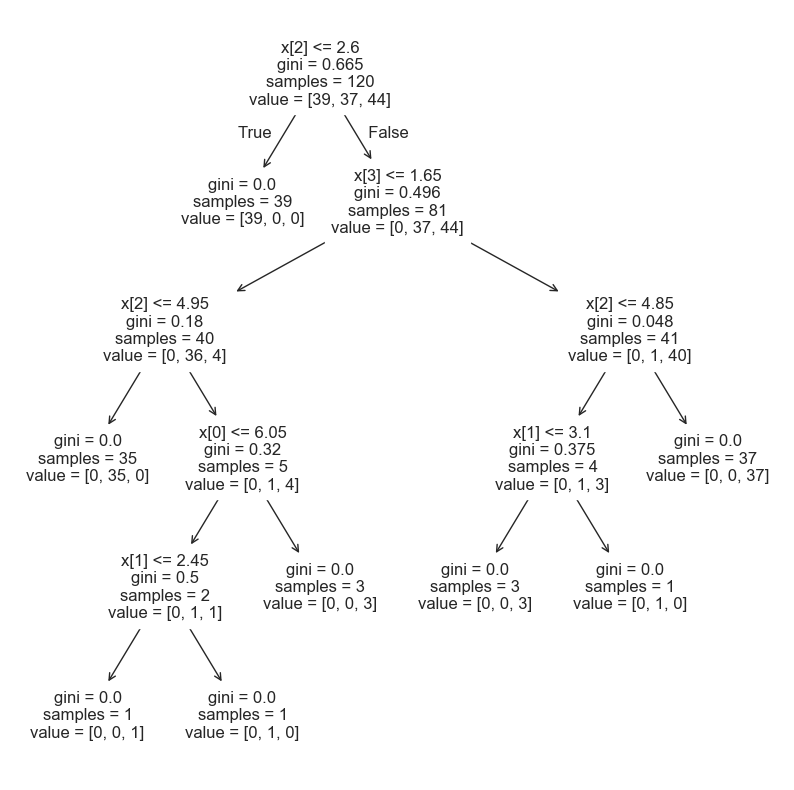

In [15]:
# Entscheidungsbaum darstellen:
plt.figure(figsize=(10, 10))
plot_tree(tree)
plt.show()

In [16]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [21]:
X.iloc[:, 2]

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal_length, Length: 150, dtype: float64

In [ ]:
# Wofür steht Gini?
# Gibt die Unreinheit eines Astes (Node) oder eines Blattes an (aus Sicht des Vertreters der größten Klasse im Blatt).
# Je näher an 1, desto "unreiner" ein Blatt. 0 bedeutet ein reines Blatt, das nur noch Vertreter einer Klasse enthält.
# Rechnerisch ist Gini Impurity die Wahrscheinlichkeit, dass man beim zufälligen Rausgreifen zweier Elemente (mit Zurücklegen) zwei verschiedene Elemente erhält.
# Wofür steht samples?
# samples ist die Gesamtzahl der Einträge im Datensatz.
# Wofür steht value?
# ist eine Liste mit den Anzahlen der verschiedenen Klassen.

In [24]:
tree.feature_names_in_

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

In [23]:
tree.feature_names_in_[2]

'petal_length'

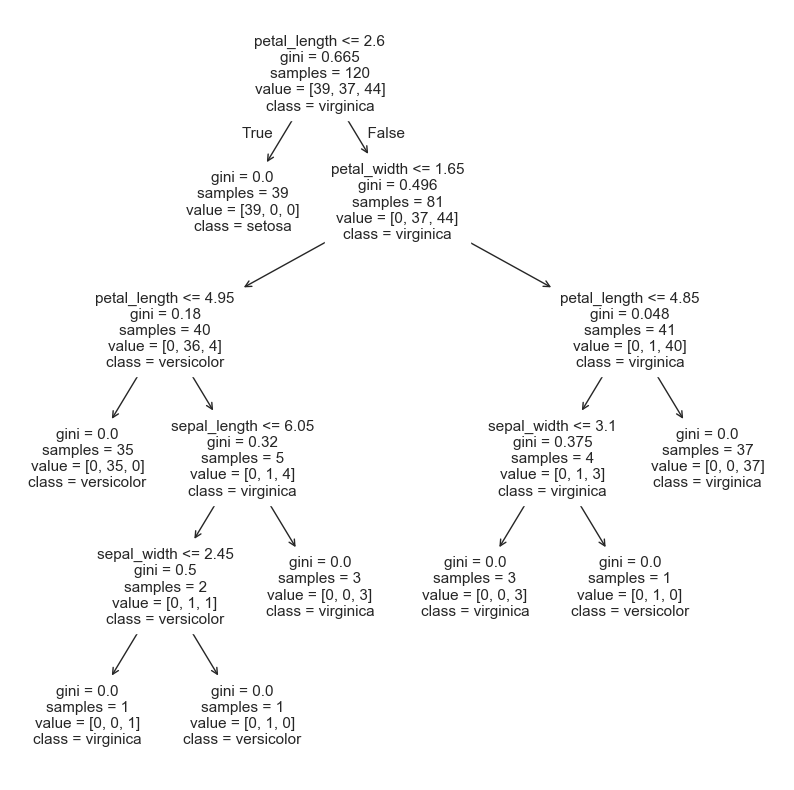

In [30]:
# Entscheidungsbaum schöner darstellen:
plt.figure(figsize=(10, 10))

class_names = sorted(y_train.unique())

plot_tree(
    tree,
    feature_names=tree.feature_names_in_,
    class_names=class_names,
)
plt.show()

In [26]:
y_train.value_counts()

species
virginica     44
setosa        39
versicolor    37
Name: count, dtype: int64

In [27]:
# Nur Classnames:
y_train.unique()

array(['versicolor', 'virginica', 'setosa'], dtype=object)

In [29]:
# Classnames alphabetisch sortiert:
sorted(y_train.unique())

['setosa', 'versicolor', 'virginica']

In [ ]:
# Exkurs: Blatt-Überprüfung mit Pandas-Mitteln:

In [31]:
setosa_split = X_train[X_train['petal_length'] <= 2.6]
setosa_split

,sepal_length,sepal_width,petal_length,petal_width
48,5.3,3.7,1.5,0.2
28,5.2,3.4,1.4,0.2
17,5.1,3.5,1.4,0.3
18,5.7,3.8,1.7,0.3
4,5.0,3.6,1.4,0.2
45,4.8,3.0,1.4,0.3
39,5.1,3.4,1.5,0.2
36,5.5,3.5,1.3,0.2
11,4.8,3.4,1.6,0.2
12,4.8,3.0,1.4,0.1


In [32]:
len(setosa_split)

39

In [37]:
setosa_indices = setosa_split.index
setosa_indices

Index([48, 28, 17, 18,  4, 45, 39, 36, 11, 12,  2,  6, 46, 10, 34, 32, 38, 27,
       23,  9, 15, 41, 26, 43, 24, 49, 21,  3, 30, 47, 13,  8,  0,  1, 22,  7,
       20, 25, 37],
      dtype='int64')

In [40]:
y_train.index.isin([91, 12, 69])

array([ True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [41]:
y_train[y_train.index.isin([91, 12, 69])]

91    versicolor
69    versicolor
12        setosa
Name: species, dtype: object

In [42]:
type(y_train)

pandas.core.series.Series

In [ ]:
y_train[y_train.index.isin(setosa_indices)]

In [47]:
# Besser und einfacher als mit isin:
y_train.loc[setosa_indices]

48    setosa
28    setosa
17    setosa
18    setosa
4     setosa
45    setosa
39    setosa
36    setosa
11    setosa
12    setosa
2     setosa
6     setosa
46    setosa
10    setosa
34    setosa
32    setosa
38    setosa
27    setosa
23    setosa
9     setosa
15    setosa
41    setosa
26    setosa
43    setosa
24    setosa
49    setosa
21    setosa
3     setosa
30    setosa
47    setosa
13    setosa
8     setosa
0     setosa
1     setosa
22    setosa
7     setosa
20    setosa
25    setosa
37    setosa
Name: species, dtype: object

In [48]:
y_train.loc[setosa_indices].unique()

array(['setosa'], dtype=object)

In [49]:
y_train.loc[setosa_indices].value_counts()

species
setosa    39
Name: count, dtype: int64

In [ ]:
# Exkurs Ende.

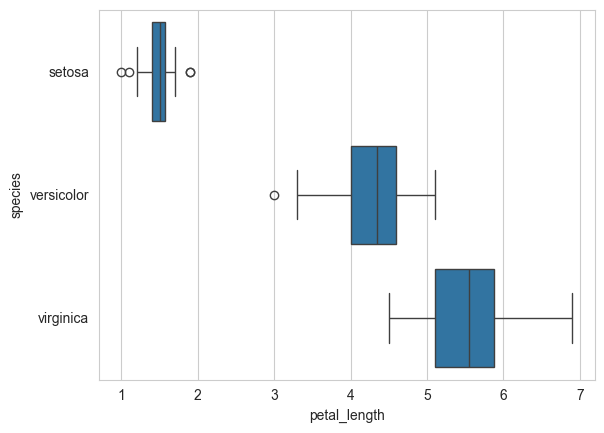

In [50]:
# Überprüfung des ersten Knotenpunkts -> Warum wird genau dieser Trennwert gewählt?
sns.boxplot(data=iris, x="petal_length", y="species")
plt.show()

In [52]:
tree.feature_names_in_

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

In [51]:
tree.feature_importances_

array([0.00752037, 0.03133487, 0.57201197, 0.38913279])

In [53]:
dict(zip(tree.feature_names_in_, tree.feature_importances_))

{'sepal_length': np.float64(0.007520367662419047),
 'sepal_width': np.float64(0.03133486526007938),
 'petal_length': np.float64(0.5720119738625142),
 'petal_width': np.float64(0.3891327932149873)}

In [55]:
# min_samples_leaf ausprobieren:
tree = DecisionTreeClassifier(min_samples_leaf=4)
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.9666666666666667

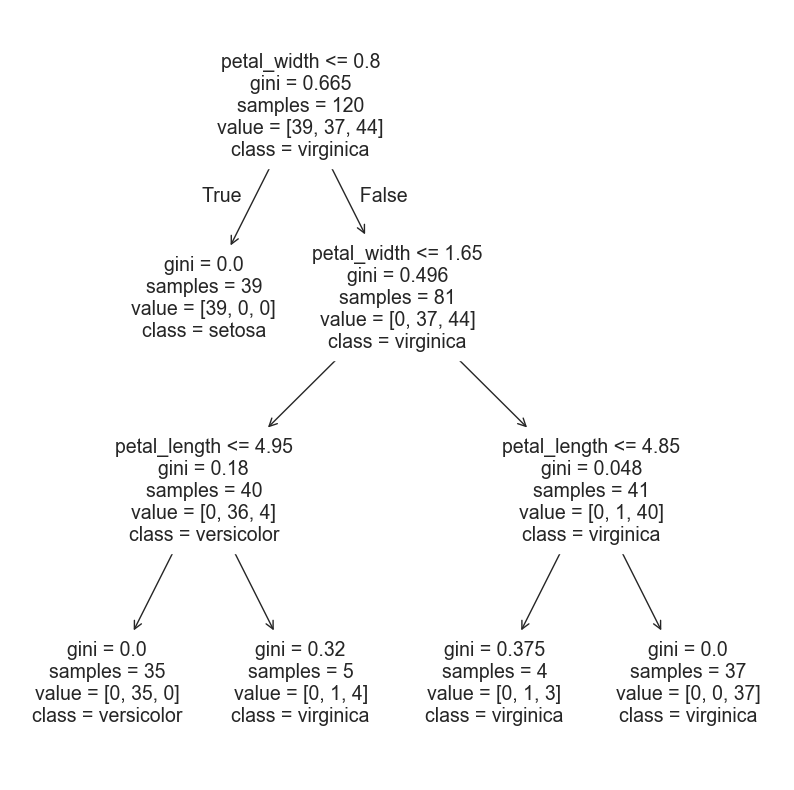

In [58]:
plt.figure(figsize=(10, 10))

class_names = sorted(y_train.unique())

plot_tree(
    tree,
    feature_names=tree.feature_names_in_,
    class_names=class_names,
)
plt.show()

In [59]:
# Verringerung der Tiefe bringt keine positiven Effekte:
tree = DecisionTreeClassifier(max_depth=1)
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.5666666666666667

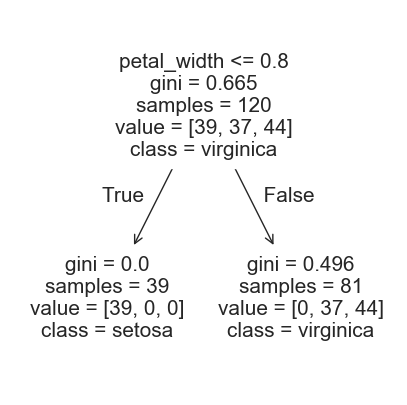

In [61]:
plt.figure(figsize=(5, 5))

class_names = sorted(y_train.unique())

plot_tree(
    tree,
    feature_names=tree.feature_names_in_,
    class_names=class_names,
)
plt.show()

In [ ]:
# Beispiel, wo geringere Tiefe das Resultat verbessert!

In [62]:
cancer = load_breast_cancer()

In [65]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]], shape=(569, 30)),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,

In [68]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [70]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]], shape=(569, 30))

In [71]:
type(cancer.data)

numpy.ndarray

In [72]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [66]:
# Werte auf der Zielvariablen:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [69]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [73]:
X = cancer.data
y = cancer.target

In [74]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y,
)

In [75]:
# Baum mit Standardwerten:
default_tree = DecisionTreeClassifier()
default_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [77]:
# WOW! Perfektion wurde erreicht!
default_tree.score(X_train, y_train)

1.0

In [76]:
# Leider war das alles nur Overfitting!
default_tree.score(X_test, y_test)

0.8947368421052632

In [ ]:
# Mit maximaler Tiefe von 4:

In [82]:
# Gestutzter Baum:
pruned_tree = DecisionTreeClassifier(max_depth=4, random_state=42)
pruned_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [83]:
pruned_tree.score(X_train, y_train)

0.9868131868131869

In [84]:
pruned_tree.score(X_test, y_test)

0.9385964912280702

In [85]:
# Wäre definitiv auch was für Gridsearch:
for depth in range(1, 5):
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    print(tree.score(X_test, y_test))

0.9210526315789473
0.8947368421052632
0.9385964912280702
0.9385964912280702


# Random Forest

Als Random Forest werden Modelle bezeichnet, die eine Vielzahl an Entscheidungsbäumen gleichzeitig verwenden, um Vorhersagen zu treffen.<br><br> 
Dafür werden Decision Trees wachsen gelassen, die nach verschiedenen Prinzipien ihre "Fragen" an die Daten stellen (beim Start spielt Zufall eine Rolle, darum RANDOM Forest).
<br><br>
Genauer genommen werden Stichproben (bootstrap samples) aus dem Datensatz so oft gezogen, bis die Größe des ursprünglichen Datensatzes erreicht ist und an solchen, immer etwas unterschiedlichen Datensätzen, üben sich die Bäume. Außerdem wählen sie an jeder Verästelung (Node) zufällig immer nur einen Teil der verfügbaren Variablen und versuchen dann aus diesem Subset die sinnvollste Variabel für den nächsten Split zu ermitteln.<br><br> 
Aus den so entstandenen vielen Bäumen wird dann ein einziger Baum gebildet, in den die Entscheidungen einfließen, die statistisch am häufigsten getroffen wurden. Man könnte sagen, dass aus dem Random Forest ein "Durchschnittsbaum" gebildet wird.

In [86]:
# Features und Zielvariable zuordnen:
X = iris.drop("species", axis=1)
y = iris["species"]

In [92]:
# Daten splitten
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=1)

In [93]:
# Ein Wald mit 100 Bäumen:
forest = RandomForestClassifier(n_estimators=100, random_state=1)
forest.fit(X_train, y_train)
print('Train:', forest.score(X_train, y_train))
print('Test:', forest.score(X_test, y_test))

Train: 1.0
Test: 0.9666666666666667


In [94]:
# Ein Wald mit 1000 Bäumen:
forest = RandomForestClassifier(n_estimators=1000, random_state=1)
forest.fit(X_train, y_train)
print('Train:', forest.score(X_train, y_train))
print('Test:', forest.score(X_test, y_test))
# Mehr Berechnung und keine Vorteile in diesem Fall.

Train: 1.0
Test: 0.9666666666666667


In [ ]:
# Verbessert Random Forest das Ergebnis beim Cancer-Dataset?

In [95]:
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

In [96]:
cancer_forest = RandomForestClassifier(n_estimators=110)
cancer_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=110)

In [97]:
print('Train:', cancer_forest.score(X_train, y_train))
print('Test:', cancer_forest.score(X_test, y_test))

Train: 1.0
Test: 0.956140350877193


In [98]:
y_pred = cancer_forest.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1])

In [99]:
y_test

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1])

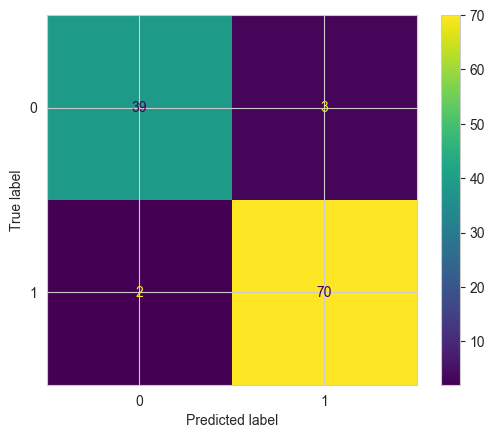

In [100]:
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred
)
plt.show()

# Übungsaufgabe:
### Erstelle einen Entscheidungsbaum, welcher die Inselzugehörigkeit der Pinguine anhand der 4 numerischen Variablen des Datensatzes vorhersagt. Stelle den Baum am Ende graphisch dar. Stutze ihn danach und schaue, ob es das Ergebnis verbessert. Zu guter Letzt versuche das Ganze erneut mit einem RandomForest.